<a href="https://colab.research.google.com/github/suzanaporto/Metricas_de_Software/blob/master/Metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métricas de Software

## Especificação do Trabalho

1.   Buscar 2 projetos no github
2.   Fazer 3 métricas (Comprimento do código/ Índice Fog/ Fan-in Fan-out)

### Download do Github

In [0]:
# Inicializando Dependencias
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
# Download do github / Escalonadores de memória
# Clonar repositórios
!git clone https://github.com/Beroni/Escalonador-Memoria.git
!git clone https://github.com/suzanaporto/Memory_Allocation.git

Cloning into 'Escalonador-Memoria'...
remote: Enumerating objects: 7, done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (7/7), done.
Cloning into 'Memory_Allocation'...
remote: Enumerating objects: 13, done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 13
Unpacking objects: 100% (13/13), done.


In [3]:
!ls

Escalonador-Memoria  Memory_Allocation	sample_data


### 1) Comprimento de Código
Verificar quantidade de linhas de código cada arquivo possui

In [0]:
projects = [i for i in os.listdir("/content/") if i != "sample_data" and not i.startswith(".")]

dados_proj1 = []
dados_proj2 = []
proj = 0

# Iterar projetos
for project in projects:
  proj += 1
  # Lista com os arquivos do projeto
  files = [i for i in os.listdir("/content/"+project) if i.endswith("py")]
  for file in files:
    f = open("/content/"+ project+ "/" + file).readlines()
    f = [i.strip('\n') for i in f]

    count = 0
    for i in f:
      if i != "":
        count += 1

    if(proj == 1):
      dados_proj1.append([file, count])
    else:
      if(proj == 2):
        dados_proj2.append([file, count])


In [73]:
# Linhas de código no DataFrame
df = pd.DataFrame(dados_proj1, columns=["Nome do Arquivo", "Quantidade de Linhas"])
df.name = "Memory Allocation"
dfs = pd.DataFrame(dados_proj2, columns=["Nome do Arquivo", "Quantidade de Linhas"])
dfs.name = "Escalonador de Memória"

display(dfs)
display(df)

,Nome do Arquivo,Quantidade de Linhas
0,Best_Fit.py,248
1,Process.py,10
2,Memory.py,11
3,Worst_Fit.py,248
4,Mem_Seg.py,7
5,Main_animation.py,64
6,First_Fit.py,238


,Nome do Arquivo,Quantidade de Linhas
0,main.py,97
1,teste.py,15


In [74]:
# Médias
media_1 = dfs["Quantidade de Linhas"].mean()
media_2 = df["Quantidade de Linhas"].mean()

print(media_1)
print(media_2)

118.0
56.0


In [75]:
# Variancia
var_1 = dfs["Quantidade de Linhas"].var()
var_2 = df["Quantidade de Linhas"].var()

print("DFS: " + str(var_1))
print("DF: " + str(var_2))

DFS: 14425.0
DF: 3362.0


### 2) Índice Fog
Verificar se o nome das variáveis está muito grande

In [0]:
projects = [i for i in os.listdir("/content/") if i != "sample_data" and not i.startswith(".")]

dados_fog_proj1 = []
dados_fog_proj2 = []
proj = 0

# Iterar projetos
for project in projects:
  proj += 1
  # Lista com os arquivos do projeto
  files = [i for i in os.listdir("/content/"+project) if i.endswith("py")]
  # Iterar arquivos
  for file in files:
    # Open file
    f = open("/content/"+ project+ "/" + file).readlines()
    # Take out \n from each line
    f = [i.strip('\n') for i in f]
    f = [i.split('=')[0].strip(" ") for i in f if '=' in i]
    count = 0
    for i in f:
      if(proj == 1): 
        dados_fog_proj1.append([i,len(i)])
      else:
        if(proj == 2):
          dados_fog_proj2.append([i,len(i)])

In [76]:
# Variáveis
df_fog = pd.DataFrame(dados_fog_proj1, columns=["Variavel", "Tamanho da palavra"])
df_fog.name = "Memory Allocation"
dfs_fog = pd.DataFrame(dados_fog_proj2, columns=["Variavel", "Tamanho da palavra"])
dfs_fog.name = "Escalonador de Memória"

df_fog.drop_duplicates(keep = 'first', inplace = True) 
dfs_fog.drop_duplicates(keep = 'first', inplace = True) 

for (index,row) in df_fog.iterrows():
  if ("if" in row['Variavel']) or (" " in row['Variavel']) or ("(" in row['Variavel']) or ("." in row['Variavel']) or ("[" in row['Variavel']):
    df_fog.drop(index, inplace=True)

for (index, row) in dfs_fog.iterrows():
  if ("if" in row['Variavel']) or (" " in row['Variavel']) or ("(" in row['Variavel']) or ("." in row['Variavel']) or ("[" in row['Variavel']):
    dfs_fog.drop(index, inplace=True)

dfs_fog = dfs_fog.reset_index(drop=True)
df_fog = df_fog.reset_index(drop=True)

print("DFS")
display(dfs_fog)
print("DF")
display(df_fog)

DFS


,Variavel,Tamanho da palavra
0,grd,3
1,proc_list,9
2,mem_seg,7
3,mem_seg_free,12
4,proc_color,10
5,rdn_bt,6
6,rdn_at,6
7,rdn_size,8
8,p_name,6
9,p,1


DF


,Variavel,Tamanho da palavra
0,MemorySize,10
1,Memory,6
2,MemorytoAlocateSize,19
3,allocate,8
4,firstZero,9
5,count,5
6,firstZeroindex,14
7,worstZeroindex,14
8,longest,7
9,bestZeroindex,13


In [69]:
# Valor Máximo
maximo_df = df_fog['Tamanho da palavra'].max()
maximo_dfs = dfs_fog['Tamanho da palavra'].max()

print("DF: " + str(maximo_df))
print("DFS: " + str(maximo_dfs))

DF: 19
DFS: 18


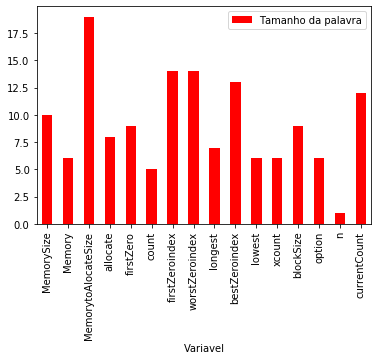

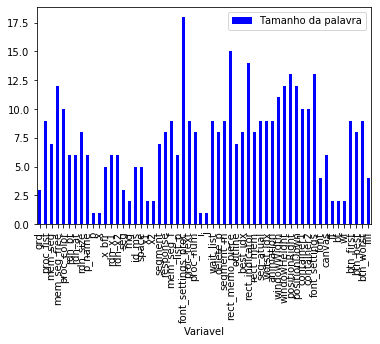

In [82]:
# Gráfico
df_fog.plot(kind='bar',x='Variavel',y='Tamanho da palavra',color='red')
plt.show()

dfs_fog.plot(kind='bar',x='Variavel',y='Tamanho da palavra',color='blue')
plt.show()

### 3) Fan-In / Fan-Out

In [0]:
projects = [i for i in os.listdir("/content/") if i != "sample_data" and not i.startswith(".")]

dados_fan_proj1 = []
dados_fan_proj2 = []
proj = 0

# Iterar projetos
for project in projects:
  proj += 1
  # Lista com os arquivos do projeto
  files = [i for i in os.listdir("/content/"+project) if i.endswith("py")]
  # Iterar arquivos
  for file in files:
    # Open file
    f = open("/content/"+ project+ "/" + file).readlines()
    # Take out \n from each line
    f = [i.strip('\n').strip() for i in f]
    f = [i for i in f if 'def' in i and not i.startswith("#")]

    for i in f:
      if(proj == 1): 
        dados_fan_proj1.append(str(i))
      else:
        if(proj == 2):
          dados_fan_proj2.append(str(i))

In [110]:
print("DF")
for i in dados_fan_proj1:
  print(i)
print("DFS")
for j in dados_fan_proj2:
  print(j)

DF
def fillMemory():
def first_fit(blockSize):
def worst_fit(blockSize):
def best_fit(blockSize):
DFS
def initialize(self, canvas):
def Best_fit_run(self, canvas):
def __init__(self, id_p, name, burst_time, color, arrival_time, size, x_place=0, y_place=0):
def create_grid(self, canvas):
def initialize(self, canvas):
def Worst_fit_run(self,canvas):
def __init__(self, name_ms, id_ms, space, x1, x2):
def __main__():
def first_run_event():
def best_run_event():
def worst_run_event():
def initialize(self, canvas):
def First_fit_run(self, canvas):
